* Ouzo_Sampling_Wtf_Lattice_Volume contains all the functions responsible for calculating sample information, which includes component weight fractions and stock volumes. 
* OT2_Ouzo_Commands_API2 contains the commands for the OT2 robot. 
* Ouzo_Graph_Tools contains graphing tools to help visualize and explore parameter spaces.

In [34]:
import Ouzo_Sampling_Wtf_Lattice_Volume as create
import OT2_Ouzo_Commands_API2 as ot2_commands
import Ouzo_Graph_Tools as ouzo_graphs
from opentrons import simulate, execute, protocol_api
import os
import pandas as pd

#### Creating Samples
* Sample creation begins with the use of an csv file which contains all the information regarding sample, stock and OT2 specfication. 
    * At the moment, the excel sheet is not very flexible so do not try to stray away with changing the formatting of variables (i.e. variables shown as list should be maintained as list even if there is only one entry - See the provided templete to get started)
* The csv file can and should be opened in Excel, once opened you should note the three colors: 
    * Green: Absolute requirements in order to create samples and execute commands on the OT2.
    * Yellow: An optional transfer conducted at the end of the OT2 commands originating from the green variables. 
    * Blue: An optional and independent transer which required its own protocol object, will fail if attempting to run using protocol object tied to green and yellow.


## Step 1: Provide the path and volume constraints to create the experiments info dictionary.
* This instructional dictionary will contain the following: 
    * experiment_plan_dict: A dictionary that contains all the information from the csv plan. 
    * wtf_sample_canidates: An array containing the unfiltered sample wtfs (in respective order of component to component list). 
    * volume_sample_canidates: An array containing the unfiltered sample stock volumes
    * filtered_wtf_samples: An array containing the filtered sample wtfs 
    * volume_sample_canidates: An array containing the filtered sample stock volumes

* Volume constraints (in uL) are for the purpose of preventing a single stock volume from being split up in between multiple transfer. This is important when making ouzo emulsions are the final step of water should be done in one step. Addtionally less trasnfers result in less variability. 
* If you encounter an error such as "max() arg is an empty sequence" or where a called variable is empty, the most likely cause is a result of not creating any suitable samples given the provided variables. Try to change the parameters in the excel sheet or the volume constaints, once you are able to create a dictionary step 2 will help you refine your search!

In [35]:
# path to work from back
dir_path_back = os.getcwd()
testing_plans_dir = dir_path_back + '\Testing Plans'
testing_plan_name = '\\11_11_2020.csv' # numbers mean \\1 = \1
final_testing_plan_path = testing_plans_dir+testing_plan_name
print(final_testing_plan_path, os.path.isfile(final_testing_plan_path))

C:\Users\Edwin\Desktop\Repos\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Testing Plans\11_11_2020.csv True


In [36]:
path = final_testing_plan_path
experiment_instructions = create.experiment_sample_dict(path, min_input_volume=30, max_input_volume=1000)
experiment_plan_dict = experiment_instructions['experiment_plan_dict']
wtf_sample_canidates = experiment_instructions['wtf_sample_canidates']

In [37]:
# here can use the volumes and wtf to find culprits, 
volume_comp = create.rearrange(experiment_instructions['volume_sample_canidates'])
for i in experiment_instructions['volume_sample_canidates']:
    print(i)

[1.05000006e+02 8.74999268e+01 5.93888665e-01 7.01730175e+00
 6.19867722e+02]
[1.05000006e+02 8.74999268e+01 5.93888665e-01 1.69399138e+01
 6.05877049e+02]
[105.0000061   87.49992681   0.59388867  26.78973587 591.88637575]
[105.0000061   87.49992681   0.59388867  36.56505334 577.89570286]
[105.0000061   87.49992681   0.59388867  46.26417008 563.90502998]
[105.0000061   87.49992681   0.59388867  55.88541207 549.9143571 ]
[105.0000061   87.49992681   0.59388867  65.42713137 535.92368421]
[105.0000061   87.49992681   0.59388867  74.88771001 521.93301133]
[105.0000061   87.49992681   0.59388867  84.26556392 507.94233844]
[105.0000061   87.49992681   0.59388867  93.55914678 493.95166556]
[105.0000061   87.49992681   0.59388867 102.76695397 479.96099267]
[105.0000061   87.49992681   0.59388867 111.88752644 465.97031979]
[105.0000061   87.49992681   0.59388867 120.91945464 451.9796469 ]
[105.0000061   87.49992681   0.59388867 129.86138238 437.98897402]
[105.0000061   87.49992681   0.59388867 

[ 105.0000061    87.49992681  183.02430424 -155.03031025  603.15520508]
[ 105.0000061    87.49992681  183.02430424 -145.18048823  589.16453219]
[ 105.0000061    87.49992681  183.02430424 -135.40517075  575.17385931]
[ 105.0000061    87.49992681  183.02430424 -125.70605401  561.18318642]
[ 105.0000061    87.49992681  183.02430424 -116.08481202  547.19251354]
[ 105.0000061    87.49992681  183.02430424 -106.54309272  533.20184065]
[105.0000061   87.49992681 183.02430424 -97.08251408 519.21116777]
[105.0000061   87.49992681 183.02430424 -87.70466018 505.22049488]
[105.0000061   87.49992681 183.02430424 -78.41107732 491.229822  ]
[105.0000061   87.49992681 183.02430424 -69.20327013 477.23914911]
[105.0000061   87.49992681 183.02430424 -60.08269765 463.24847623]
[105.0000061   87.49992681 183.02430424 -51.05076945 449.25780334]
[105.0000061   87.49992681 183.02430424 -42.10884171 435.26713046]
[105.0000061   87.49992681 183.02430424 -33.25821333 421.27645758]
[105.0000061   87.49992681 183.0

[ 105.0000061    87.49992681  301.60407436 -162.83141512  447.48860503]
[ 105.0000061    87.49992681  301.60407436 -153.88948738  433.49793215]
[ 105.0000061    87.49992681  301.60407436 -145.03885899  419.50725926]
[ 105.0000061    87.49992681  301.60407436 -136.28076768  405.51658638]
[ 105.0000061    87.49992681  301.60407436 -127.61638608  391.52591349]
[ 105.0000061    87.49992681  301.60407436 -119.04681782  377.53524061]
[ 105.0000061    87.49992681  301.60407436 -110.57309368  363.54456772]
[ 105.0000061    87.49992681  301.60407436 -102.19616762  349.55389484]
[ 105.0000061    87.49992681  310.72559514 -285.33207921  615.24058747]
[ 105.0000061    87.49992681  310.72559514 -275.40946712  601.24991459]
[ 105.0000061    87.49992681  310.72559514 -265.5596451   587.2592417 ]
[ 105.0000061    87.49992681  310.72559514 -255.78432762  573.26856882]
[ 105.0000061    87.49992681  310.72559514 -246.08521088  559.27789593]
[ 105.0000061    87.49992681  310.72559514 -236.46396889  545.28

## Step 2: Parameter Space Explortion: 
* Searching through different stocks is useful in order to find suitable stock canidates. By iterating through a linspace of stocks alongside sample canidates graphs are produced with important information that will help you decided on a suitable stock. 
* The information regarding the iteration through stocks is found in the csv file under the variable:  Stock Concentration [min, max, n]. Another similar vairable listed as just Stock Concentration is used for single exploration.
* To select a stock provide the index number (found on graph).

### Optional: Graphing/Visualization: Will not run on OT2 jupyter notebook
* This step is useful to see the parameter space you are exploring and whether you need to expand/contract it. 
    * On the left hand side of the provided graph should be information regarding stock and sample information. 

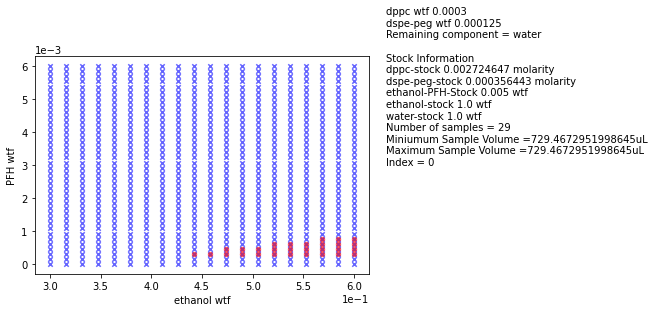

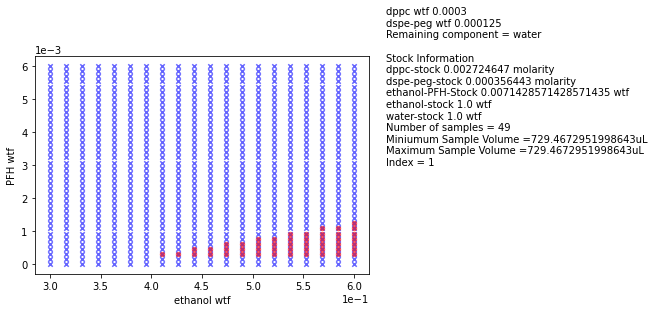

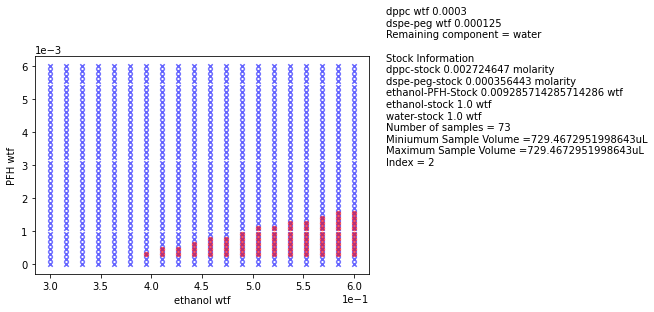

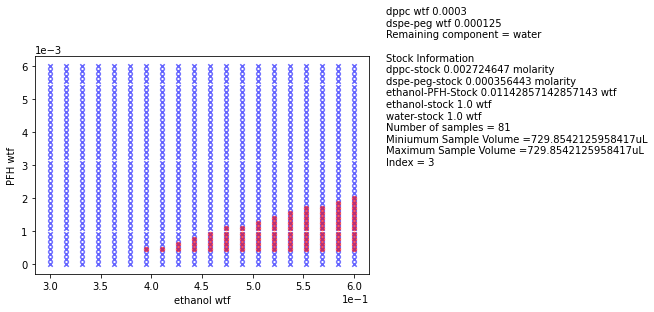

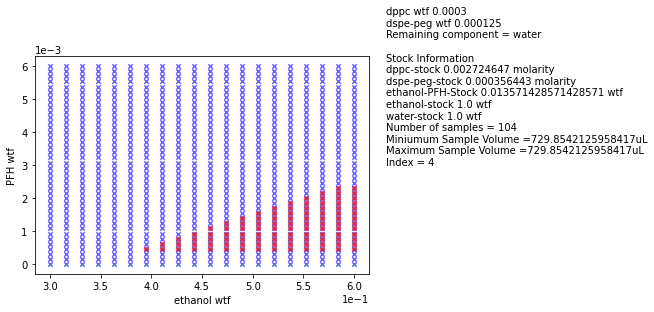

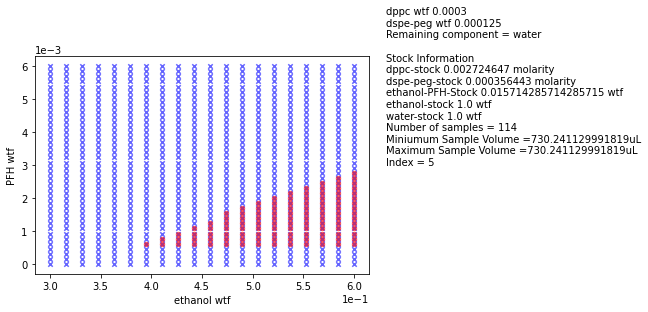

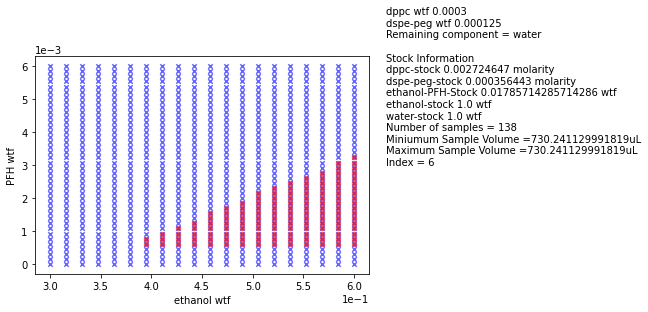

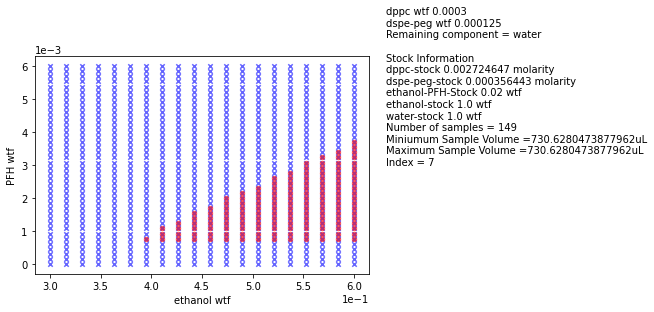

In [5]:
stock_unfiltered_sample_wtfs_canidates = create.generate_candidate_lattice_stocks(experiment_plan_dict)
stock_filtered_sample_wtfs_canidates, stock_filtered_sample_volumes_canidates, stock_text = create.prepare_stock_search(stock_unfiltered_sample_wtfs_canidates, experiment_plan_dict, wtf_sample_canidates, 30, 1000)
ouzo_graphs.stock_search(experiment_instructions, wtf_sample_canidates, stock_filtered_sample_wtfs_canidates, stock_text)

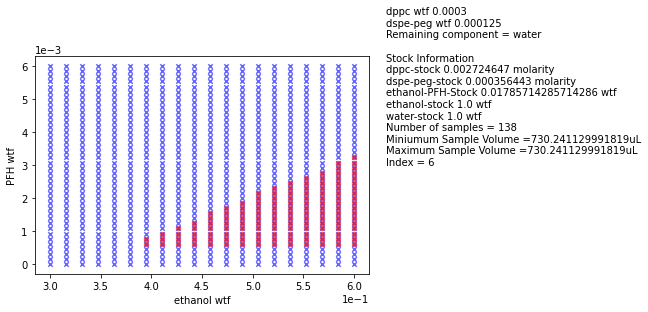

In [6]:
index = 6
selected_stock_canidate_component_wtfs = stock_filtered_sample_wtfs_canidates[index]
selected_stock_canidate_component_volumes = stock_filtered_sample_volumes_canidates[index]
selected_stock_text = stock_text[index]
ouzo_graphs.graph_canidates(experiment_instructions, wtf_sample_canidates, selected_stock_canidate_component_wtfs, additional_text = selected_stock_text)

## Step 3: Calculate stock volumes
* Determine the amount of each stock needed

In [7]:
create.calculate_stock_volumes(experiment_plan_dict, selected_stock_canidate_component_volumes)

14.49000084128949 mL of dppc-stock w/ conc of 0.002724647 molarity
12.074989899270937 mL of dspe-peg-stock w/ conc of 0.000356443 molarity
10.288454138266797 mL of ethanol-PFH-Stock w/ conc of 0.0149199 wtf
10.236558743763243 mL of ethanol-stock w/ conc of 1 wtf
57.25198413365449 mL of water-stock w/ conc of 1 wtf


## Step 4: Input selected stock information
* Once you have selected the appropiate stock, create the stock and input the exact concentrations in the csv file under the variable: Stock Concentration (since mosty likely you will not create a stock concentration exactly matching selection). 
### The experiment_instruction automatically create the required volumes for the selected input stock! Just call them from the dictionary as the variables: 'volume_sample_canidates'
#
* Now you can create the appropiate variables from this stock that will be used in the final protocol: volumes and stock concentrations arrays!
* You can also restrict the number of samples you create if you are limited on labware.

In [38]:
selected_filtered_wtfs = experiment_instructions['filtered_wtf_samples']
selected_filtered_volumes = experiment_instructions['filtered_volume_samples']

def selected_down(array, lower_index, upper_index):
    array = array[lower_index:upper_index]
    return array

lower_index = 0
upper_index = 95
final_volumes = selected_down(selected_filtered_volumes, lower_index, upper_index)
final_wtfs = selected_down(selected_filtered_wtfs, lower_index, upper_index)

## Step 4a: Add optional blank
* Using the add_blank function, provide the volume for the blank, in addition to the selected wtfs and volumes for the experiment so they can be appended to the end of the respective array. Blank component information should be added to experiment csv file

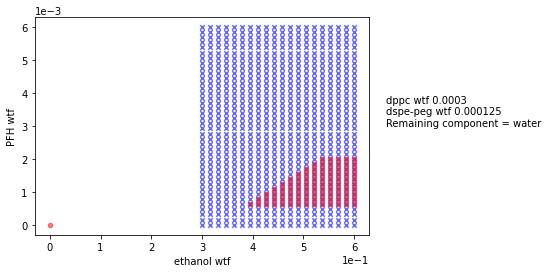

In [14]:
seleted_wtfs_plus_blank, selected_volumes_plus_blank = create.add_blank(final_wtfs, final_volumes, 800, experiment_plan_dict['Blank Component Concentrations (wtfs)'])
ouzo_graphs.graph_canidates(experiment_instructions, wtf_sample_canidates, seleted_wtfs_plus_blank)

## Step 5: Run the OT2 commands
* Now that a stock and its corresponding volhave been selected run the command code.
* Future: make it so the can edit stock information and print the amount of stock needed (instructions for stock creation)

In [39]:
protocol = simulate.get_protocol_api('2.0')
command_info = ot2_commands.create_samples(protocol, experiment_plan_dict, selected_volumes_plus_blank) 

C:\Users\Edwin\.opentrons\deck_calibration.json not found. Loading defaults
C:\Users\Edwin\.opentrons\robot_settings.json not found. Loading defaults


Picking up tip from A1 of Opentrons 96 Tip Rack 300 µL on 10
Transferring 105.00000609630035 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A1 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 105.00000609630035 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 150.0 uL/sec
Dispensing 105.00000609630035 uL into A1 of Corning 96 Well Plate 360 µL Flat on 2 at 300.0 uL/sec
Transferring 105.00000609630035 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A2 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 105.00000609630035 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 150.0 uL/sec
Dispensing 105.00000609630035 uL into A2 of Corning 96 Well Plate 360 µL Flat on 2 at 300.0 uL/sec
Transferring 105.00000609630035 from A1 of Corning 96 Well Plate 360 µL Flat on 1 to A3 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 105.00000609630035 uL from A1 of Corning 96 Well Plate 360 µL Flat on 1 at 150.0 uL/sec
Dispensing 105.00000609630035 uL into A3 of Corning 96

Transferring 44.353838015381065 from A4 of Corning 96 Well Plate 360 µL Flat on 1 to H8 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 44.353838015381065 uL from A4 of Corning 96 Well Plate 360 µL Flat on 1 at 150.0 uL/sec
Dispensing 44.353838015381065 uL into H8 of Corning 96 Well Plate 360 µL Flat on 2 at 300.0 uL/sec
Transferring 52.92340626979525 from A4 of Corning 96 Well Plate 360 µL Flat on 1 to H9 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 52.92340626979525 uL from A4 of Corning 96 Well Plate 360 µL Flat on 1 at 150.0 uL/sec
Dispensing 52.92340626979525 uL into H9 of Corning 96 Well Plate 360 µL Flat on 2 at 300.0 uL/sec
Transferring 61.39713041276801 from A4 of Corning 96 Well Plate 360 µL Flat on 1 to H10 of Corning 96 Well Plate 360 µL Flat on 2
Aspirating 61.39713041276801 uL from A4 of Corning 96 Well Plate 360 µL Flat on 1 at 150.0 uL/sec
Dispensing 61.39713041276801 uL into H10 of Corning 96 Well Plate 360 µL Flat on 2 at 300.0 uL/sec
Transferring 69.7740

In [ ]:
protocol1 = simulate.get_protocol_api('2.0')
ot2_commands.simple_independent_transfer(protocol1, dict_1['experiment_plan_dict'])

## Step 6: Create a csv file containing all the information of the experiment for storage and future linking

In [40]:
create.create_csv(r"C:\Users\Edwin\Desktop\11_11_20\experiment_info", command_info['command info'], seleted_wtfs_plus_blank, experiment_plan_dict)
df = pd.read_csv(r"C:\Users\Edwin\Desktop\11_11_20\experiment_info")